## Artificial Neural Network Implementation with Matrix Data structure  
(using numpy module)  

Reference:  
https://www.analyticsvidhya.com/blog/2020/07/neural-networks-from-scratch-in-python-and-r/

**import csv** or **import pandas as pd**  
ในที่นี่จะใช้ csv module เพื่อดึงข้อมูลเข้ามาใส่ใน array ของ numpy module

In [1]:
import csv
import numpy as np
with open('data_banknote_authentication.csv') as Data_file:
    Data_list = csv.reader(Data_file)
    Data = [Data for Data in Data_list]
Rawdata_array = np.asarray(Data)

#ลองพิมพ์ตัวอย่างของข้อมูลที่โหลดเข้ามาเพื่อการตรวจสอบ
print("Example of rawdata[{0:3d}]: {1}".format(0,Rawdata_array[0]))
print("Example of rawdata[{0:3d}]: {1}".format(1,Rawdata_array[1]))
print("         :           :                    :  ")
print("Example of rawdata[{0:3d}]: {1}".format(len(Rawdata_array)-2,Rawdata_array[-2]))
print("Example of rawdata[{0:3d}]: {1}".format(len(Rawdata_array)-1,Rawdata_array[-1]))
print("Number of rawdata:", len(Rawdata_array))

Example of rawdata[  0]: ['3.6216' '8.6661' '-2.8073' '-0.44699' '0']
Example of rawdata[  1]: ['4.5459' '8.1674' '-2.4586' '-1.4621' '0']
         :           :                    :  
Example of rawdata[1370]: ['-3.5637' '-8.3827' '12.393' '-1.2823' '1']
Example of rawdata[1371]: ['-2.5419' '-0.65804' '2.6842' '1.1952' '1']
Number of rawdata: 1372


In [2]:
Input_array = np.zeros((len(Rawdata_array),len(Rawdata_array[0])-1),dtype = 'f')
Target_list = list()
for i in range(len(Rawdata_array)):
        Input_array[i] = np.array(Rawdata_array[i][0:len(Rawdata_array[i])-1],dtype = 'f')
        Target_list.append(Rawdata_array[i][-1])
        
#ลองพิมพ์ทั้งส่วนที่เป็น feature และ target เพื่อการตรวจสอบ
print("Example of Input[{0:3d}]: {1}".format(0,Input_array[0]))
print("Example of Input[{0:3d}]: {1}".format(1,Input_array[1]))
print("         :         :              :  ")
print("Example of Input[{0:3d}]: {1}".format(len(Input_array)-2,Input_array[-2]))
print("Example of Input[{0:3d}]: {1}".format(len(Input_array)-1,Input_array[-1]))
print("Shape of Input: ",Input_array.shape)

print("\nExample of Target[{0:3d}]: {1}".format(0,Target_list[0]))
print("Example of Target[{0:3d}]: {1}".format(1,Target_list[1]))
print("         :      :           :  ")
print("Example of Target[{0:3d}]: {1}".format(len(Target_list)-2,Target_list[-2]))
print("Example of Target[{0:3d}]: {1}".format(len(Target_list)-1,Target_list[-1]))
print("Number of Target:", len(Target_list))

Example of Input[  0]: [ 3.6216   8.6661  -2.8073  -0.44699]
Example of Input[  1]: [ 4.5459  8.1674 -2.4586 -1.4621]
         :         :              :  
Example of Input[1370]: [-3.5637 -8.3827 12.393  -1.2823]
Example of Input[1371]: [-2.5419  -0.65804  2.6842   1.1952 ]
Shape of Input:  (1372, 4)

Example of Target[  0]: 0
Example of Target[  1]: 0
         :      :           :  
Example of Target[1370]: 1
Example of Target[1371]: 1
Number of Target: 1372


In [3]:
# หากพบว่ามีข้อมูลที่ว่างเปล่าอยู่จึงทำการลบทิ้ง เช่น
# Input_array = np.delete(Input_array,1372,0)
print("Shape of Cleaned Input:", Input_array.shape)
NumData, NumInput = Input_array.shape

Shape of Cleaned Input: (1372, 4)


In [4]:
#targetอาจจะมาในรูปของ text เลยต้องแปลงให้กลายเป็นตัวเลข หรือ เข็คจำนวนของ class
Class = list(set(Target_list))
NumOutput = len(Class) #กำหนดให้ Numoutput แสดงจำนวนของ class
print(NumOutput)

2


In [5]:
#output ถ้าหากได้รับข้อมูลที่ label มาเป็น character เช่น True/False ให้เปลี่ยนเป็น integer เช่น 1/0
#ปรับให้อยู่ในรูปนี้ class1 = 0 1, class2 = 1 0
Target_array = np.zeros((NumData,NumOutput),dtype='i') 
for i in range(NumData):
    Target_array[i][Class.index(Target_list[i])] = 1
    

print(Target_array) 
    

[[1 0]
 [1 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]


### Devided trian set และ test set    

In [6]:
#ตัวอย่างเช่น มีข้อมูลที่ถูกเรียงลำดับแล้ว มีอยู่ 2 class classละ 761 และ 610 ตัวอย่าง แบ่งเป็น 4 fold-crossvalidation
#เพราะฉะนั้น train set = 1029 ตัว  และ test set = 343 ตัว
#เราจะทำการ train และ test ทั้งหมด 4 รอบ แล้วหาค่าเฉลี่ยความแม่นยำ
# รอบแรก (round 1) จะใช้ข้อมูล fold 1, 2, 3 เป็น train set และ ใช้ fold 4 เป็น test set
# จำนวนของ train data  = 3*Numdata/4
# จำนวน test data = Numdata/4
Input_Train = np.zeros((1029,4),dtype='f')
Input_Test = np.zeros((343,4),dtype='f')
Target_Train = np.zeros((1029,2),dtype='i')
Target_Test = np.zeros((343,2),dtype='i')

NumTest = 0
NumTrain = 0
for i in range(NumData):
    #round 1 fold 1,2,3 เป็น train set และ fold 4 เป็น test set
    if (i%4) == 3:
        Input_Test[NumTest] = Input_array[i]
        Target_Test[NumTest] = Target_array[i]
        NumTest += 1
    else:
        Input_Train[NumTrain] = Input_array[i]
        Target_Train[NumTrain] = Target_array[i]
        NumTrain += 1
print('Number of Train data: ',NumTrain)
print('Number of Test data: ',NumTest)

Number of Train data:  1029
Number of Test data:  343


In [7]:
np.random.seed(14) #ฟังก์ชันสำหรับการสร้างเมล็ดในการสุ่ม(กำหนดตำแหน่งเริ่มต้นของหมายเลขสุ่มซึ่งสามารถกำหนดได้อย่างอิสระ)

In [8]:
# converting the input in matrix form
Input = Input_Train.T
print("Input in matrix form:\n", Input)

# shape of input matrix
print("\nShape of Input Matrix:", Input.shape)

Input in matrix form:
 [[  3.6216    4.5459    3.866   ...  -1.3887   -3.7503   -3.5637 ]
 [  8.6661    8.1674   -2.6383  ...  -4.8773  -13.4586   -8.3827 ]
 [ -2.8073   -2.4586    1.9242  ...   6.4774   17.5932   12.393  ]
 [ -0.44699  -1.4621    0.10645 ...   0.34179  -2.7771   -1.2823 ]]

Shape of Input Matrix: (4, 1029)


In [9]:
# output in matrix form
Target = Target_Train.T

print("\nTarget in matrix form:\n", Target)

# shape of input array
print("\nShape of Target:", Target.shape)


Target in matrix form:
 [[1 1 1 ... 0 0 0]
 [0 0 0 ... 1 1 1]]

Shape of Target: (2, 1029)


----
### Defining Hyperparameter of Model  
กำหนดขนาดของ ANN, Learning rate, Activate function เช่น
* จำนวน Input Unit = จำนวน feature 
* จำนวน Hidden Layer = 1 ขึ้นไป (เริ่มต้นด้วย 1 หรือ 2) 
* จำนวน Hidden Unit = ประมาณครึ่งหนี่ง หรือ 2/3 ของจำนวน Input Unit  + จำนวน Output Unit
* จำนวน Output Unit = จำนวน class (ในกรณีที่เป็น 2 class สามารถลดลงเหลือ 1 unit ได้)  
* Learning Rate = ค่าน้อย ๆ เช่น 0.01 หรือ 0.005 
* Activate Function เช่น Sigmoid หรือ ReLu  

จากขนาดของ ANN และ Input data จะทำให้เกิด
1. Input Matrix เป็น Matrix ที่เกิดจากเอา Input Unit vector มาประกอบกัน ทำให้มีขนาดเป็น จำนวนแถวเป็น จำนวน feature และจำนวนคอลัมภ์เป็น จำนวน observation = No.Input unit x No.Observation  
2. Hidden Unit vector = No.Hidden unit x 1  ขึ้นกับว่า มี Hidden Layer กี่ layer ถ้ามีมากกว่า 1 ก็จะมี Hidden vector มากกว่า 1 ตัว
3. Output Unit vector = No.Output unit x 1
4. Weight Matirx เช่น No.Input Unit x  No.Output Unit หรือใน layer ถัด ๆไป

In [10]:
#Number of Input Unit = 4
#Number of Output Unit = 2
#Number of Hidden Layer is 1
#Number of Hidden Unit = 2/3 * NumInput + NumOutput
NumHidden = 4
print("No.Input Unit: ",NumInput)
print("No.Hidden Layer: ", 1)
print("No.Hidden Unit: ",NumHidden)
print("No.Output Unit: ",NumOutput)

No.Input Unit:  4
No.Hidden Layer:  1
No.Hidden Unit:  4
No.Output Unit:  2


----
### Train the model
1. กำหนดค่า weight ใน Weight Matrix เร่ิมต้น โดยการ Random ค่าระหว่าง -0.1 ~ 0.1  
2. นำ Input vector จาก Input Matrix เข้าสู่กระบวนการ train ทีละ vector โดยทำการเรียงลำดับด้วยการ random หมายความว่า แต่ละรอบใช้ Label ที่ต่าง ๆกัน
3. นำ Input vector มา dot กับ Weight Matrix แล้ว มาผ่าน Activate function เพื่อเป็น Output vector (หรือ Hidden unit vector)
   e.g. output = sigmoid(dot(w,input + b)  
4. ทำทีละ Layer จนกระทั้ง ถึง Output layer
5. เมื่อได้ Output แล้วนำมาคำนวณ Error เพื่อนำมาเข้าสู่กระบวนการปรับ weight ด้วย Back propragation algorithm

In [11]:
# กำหนดค่าเริ่มต้นของ weight ในแต่ละส่วน 
weights_input_hidden = np.random.uniform(low= -0.1, high = 0.1, size=(NumInput, NumHidden))
weights_hidden_output = np.random.uniform(low = -0.1, high = 0.1, size=(NumHidden, NumOutput))
# shape of weight matrix
weights_input_hidden.shape, weights_hidden_output.shape

((4, 4), (4, 2))

In [12]:
# กำหนด Acitvate function ที่จะนำมาใช้
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [13]:
# random ลำดับของ input ที่จะถูกป้อนเข้า nerual net เพื่อใช้ในการ train
Train_seq = np.random.permutation(NumTrain)
print(Train_seq)

[ 808  928  682 ...  218 1013   27]


In [14]:
# เพื่อให้ยังคงเป็น dim = 1 จึงต้อง reshape อีกครั้งแต่ข้อมูลไม่ได้เปลี่ยน
print(Input[:,Train_seq[0]].reshape(NumInput,1))
print(Input[:,Train_seq[0]].reshape(NumInput,1).shape)

[[-1.6001  ]
 [-9.5828  ]
 [ 9.4044  ]
 [ 0.081882]]
(4, 1)


## FeedForward  
คือกระบวนการส่ง Information ที่เกิดจากการคำนวณจาก Input Layer ไปยัง Hidden Layer และ ไปยัง Output Layer โดยที่แต่ละ Layer ที่ Neural Node นั้น ๆ ต้องผ่าน Activate function ด้วย   
ซึ่งในตัวอย่างนี้จะใช้ sigmoid  เป็น activate function

#### ให้ X  --> input vector และ Y --> target vector
#### hidden_layer_input= matrix_dot_product(X,w<sub>h</sub>) + b<sub>h</sub>
#### hiddenlayer_activations = sigmoid(hidden_layer_input)

In [15]:
# at hidden layer
# calculate hidden units and activated hidden units
Hidden = np.dot(weights_input_hidden.T,Input[:,Train_seq[0]].reshape(NumInput,1))
Hidden = sigmoid(Hidden)

In [16]:
print(Hidden)
print(Hidden.shape)

[[0.60696145]
 [0.18290009]
 [0.60721178]
 [0.55088689]]
(4, 1)


#### output_layer_input = matrix_dot_product (hiddenlayer_activations, w<sub>out</sub> ) + b<sub>out</sub>
#### output = sigmoid(output_layer_input)

In [17]:
# at output layer
# calculate output units and activated output units
Output = np.dot(weights_hidden_output.T,Hidden)
Output = sigmoid(Output)

In [18]:
print(Output)
print(Output.shape)

[[0.52116525]
 [0.48606513]]
(2, 1)


### ในขั้นตอนถัดไป คือ Backpropagation alogrithm เพื่อเป้าหมายคือการ การปรับค่า weight ให้ ได้ค่า weight ที่เหมาะสมทำให้ได้ค่า output ใกล้เคียงกับ ค่า Target มากที่สุด
โดยจะทำงานย้อนกลับไปที่ละ layer จาก output ย้อนกลับไปหา input

#### ตามปรกติ Error = Y – Output
#### หรือคิดเป็น Mean Square Error (MSE) --> Error = ((Y - Output)<sup>2</sup>) /2

In [19]:
# at output layer 
# calculating error
Error = (np.square(Target[:,Train_seq[0]].reshape(NumOutput,1) - Output) / 2)
print(Error)
print(Error.shape)

[[0.13580661]
 [0.13206453]]
(2, 1)


In [20]:
# rate of change of error w.r.t. output
# dE/dO
Error_wrt_output = -(Target[:,Train_seq[0]].reshape(NumOutput,1) - Output)
print(Error_wrt_output)
print(Error_wrt_output.shape)

[[ 0.52116525]
 [-0.51393487]]
(2, 1)


![image](back_Output_Hidden_pic.png)

![image](back_Output_Hidden_equ.png)

In [21]:
# rate of change of output w.r.t. Z2
# dO/dZ2
Output_wrt_outputLayer_LinearTransform = np.multiply(Output, (1 - Output))
print(Output_wrt_outputLayer_LinearTransform)
print(Output_wrt_outputLayer_LinearTransform.shape)

[[0.24955203]
 [0.24980582]]
(2, 1)


In [22]:
# rate of change of Z2 w.r.t. weights between hidden and output layer
# dZ2/dWho
OutputLayer_LinearTransform_wrt_weights_hidden_output = Hidden
print(OutputLayer_LinearTransform_wrt_weights_hidden_output)
print(OutputLayer_LinearTransform_wrt_weights_hidden_output.shape)

[[0.60696145]
 [0.18290009]
 [0.60721178]
 [0.55088689]]
(4, 1)


In [23]:
# rate of change of error w.r.t weight between hidden and output layer
# dE/dWho 
Error_wrt_weights_hidden_output = np.dot(OutputLayer_LinearTransform_wrt_weights_hidden_output,
    (Error_wrt_output * Output_wrt_outputLayer_LinearTransform).T,)
print(Error_wrt_weights_hidden_output)
print(Error_wrt_weights_hidden_output.shape)

[[ 0.0789401  -0.07792409]
 [ 0.02378759 -0.02348143]
 [ 0.07897266 -0.07795623]
 [ 0.07164716 -0.07072502]]
(4, 2)


![image](back_Hidden_Input_pic.png)

![image](back_Hidden_Input_equ.png)

In [24]:
# rate of change of error w.r.t. output
Error_wrt_output = -(Target[:,Train_seq[0]].reshape(NumOutput,1) - Output)
print(Error_wrt_output)
print(Error_wrt_output.shape)

[[ 0.52116525]
 [-0.51393487]]
(2, 1)


In [25]:
# rate of change of output w.r.t. Z2
Output_wrt_outputLayer_LinearTransform = np.multiply(Output, (1 - Output))
print(Output_wrt_outputLayer_LinearTransform)
print(Output_wrt_outputLayer_LinearTransform.shape)

[[0.24955203]
 [0.24980582]]
(2, 1)


In [26]:
# rate of change of Z2 w.r.t. hidden layer activations
OutputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
print(OutputLayer_LinearTransform_wrt_hiddenLayer_activations)
print(OutputLayer_LinearTransform_wrt_hiddenLayer_activations.shape)

[[ 0.08651152 -0.02515105]
 [ 0.05048378  0.0526278 ]
 [ 0.07409989 -0.07797776]
 [-0.0399816  -0.00501885]]
(4, 2)


In [27]:
# rate of change of hidden layer activations w.r.t. Z1
HiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(Hidden, (1 - Hidden))
print(HiddenLayer_activations_wrt_hiddenLayer_linearTransform)
print(HiddenLayer_activations_wrt_hiddenLayer_linearTransform.shape)

[[0.23855925]
 [0.14944765]
 [0.23850563]
 [0.24741052]]
(4, 1)


In [28]:
# rate of change of Z1 w.r.t. weights between input and hidden layer
HiddenLayer_linearTransform_wrt_weights_input_hidden = Input[:,Train_seq[0]].reshape(NumInput,1)
print(HiddenLayer_linearTransform_wrt_weights_input_hidden)
print(HiddenLayer_linearTransform_wrt_weights_input_hidden.shape)

[[-1.6001  ]
 [-9.5828  ]
 [ 9.4044  ]
 [ 0.081882]]
(4, 1)


In [29]:
# shape of weights of hidden layer
print(weights_input_hidden)
print(weights_input_hidden.shape)

[[ 0.00278867  0.05463301  0.07408554 -0.09839061]
 [-0.03805281  0.09152075  0.00262334 -0.03634312]
 [ 0.00783999 -0.05574901  0.06129627 -0.03154907]
 [ 0.00777777 -0.09882524  0.0346305  -0.05799515]]
(4, 4)


In [30]:
# rate of change of error w.r.t weights between input and hidden layer
Error_wrt_weights_input_hidden = np.dot(
    HiddenLayer_linearTransform_wrt_weights_input_hidden,
    (
        HiddenLayer_activations_wrt_hiddenLayer_linearTransform
        * np.dot(OutputLayer_LinearTransform_wrt_hiddenLayer_activations,
            (Output_wrt_outputLayer_LinearTransform * Error_wrt_output),
        )
    ).T,)
print(Error_wrt_weights_input_hidden)
print(Error_wrt_weights_input_hidden.shape)

[[-5.52747416e-03  4.56145244e-05 -7.49846149e-03  1.80347109e-03]
 [-3.31033545e-02  2.73179707e-04 -4.49073522e-02  1.08007638e-02]
 [ 3.24870795e-02 -2.68094005e-04  4.40713258e-02 -1.05996893e-02]
 [ 2.82857713e-04 -2.33423436e-06  3.83719147e-04 -9.22891171e-05]]
(4, 4)


In [31]:
# กำหนดค่า learning rate
alpha = 0.01

In [32]:
# updating the weights of output layer
print("weights_hidden_output: before update")
print(weights_hidden_output)
weights_hidden_output = weights_hidden_output - alpha * Error_wrt_weights_hidden_output
print("\nweights_hidden_output: updated")
print(weights_hidden_output)

weights_hidden_output: before update
[[ 0.08651152 -0.02515105]
 [ 0.05048378  0.0526278 ]
 [ 0.07409989 -0.07797776]
 [-0.0399816  -0.00501885]]

weights_hidden_output: updated
[[ 0.08572212 -0.02437181]
 [ 0.05024591  0.05286261]
 [ 0.07331016 -0.0771982 ]
 [-0.04069808 -0.0043116 ]]


In [33]:
# updating the weights of hidden layer
print("weights_input_hidden: before update")
print(weights_input_hidden)
weights_input_hidden = weights_input_hidden - alpha * Error_wrt_weights_input_hidden
print("\nweights_input_hidden: updated")
print(weights_input_hidden)

weights_input_hidden: before update
[[ 0.00278867  0.05463301  0.07408554 -0.09839061]
 [-0.03805281  0.09152075  0.00262334 -0.03634312]
 [ 0.00783999 -0.05574901  0.06129627 -0.03154907]
 [ 0.00777777 -0.09882524  0.0346305  -0.05799515]]

weights_input_hidden: updated
[[ 0.00284394  0.05463255  0.07416052 -0.09840865]
 [-0.03772178  0.09151802  0.00307242 -0.03645112]
 [ 0.00751512 -0.05574633  0.06085556 -0.03144308]
 [ 0.00777494 -0.09882522  0.03462666 -0.05799422]]


----
ขั้นตอนที่ 5 (ต่อ) ทำกระบวนการ Train ต่อไป จนครบทุก pattern แล้วเริ่มทำอีกครั้ง (Random ลำดับการป้อน Input ใหม่) เรียกว่า จบ 1 Epoch หรือ 1 iteration   
ทำซ้ำ ๆ อีกหลาย ๆ Epoch/iteration จนกระทั้ง Error (Mean square Error) มีค่าลดลงต่ำที่สุด จึงจบกระบวนการ Train  
อาจจะต้องมีการปรับค่าบางอย่างเพื่อทำให้ Neural Network ทำกระบวนการ Train ได้ดีขึ้น เช่น 
hyperparameter ต่าง ๆ จำนวน Epoch หรือ อาจจะใช้เทคนิคอื่น ๆ เช่น weight decay , momentum (ต้องศึกษาเพิ่มเติม)

## Fold 4

In [34]:
# กำหนด Train Set และ Test set
NumTest = 0
NumTrain = 0
for i in range(NumData):
    #round 1 fold 1,2,3 เป็น train set และ fold4 เป็น test set
    if (i%4) == 3:
        Input_Test[NumTest] = Input_array[i]
        Target_Test[NumTest] = Target_array[i]
        NumTest += 1
    else:
        Input_Train[NumTrain] = Input_array[i]
        Target_Train[NumTrain] = Target_array[i]
        NumTrain += 1
print('Number of Train data: ',NumTrain)
print('Number of Test data: ',NumTest)

np.random.seed(14) 
Input = Input_Train.T
Target = Target_Train.T

Number of Train data:  1029
Number of Test data:  343


In [35]:
# จากข้างต้นทั้งหมด สรุปรวมได้ดังนี้
# กำหนดขนาดของ Network
NumInput = 4
#Number of Hidden Layer = 1
NumHidden = 4
NumOutput = 2
# กำหนดค่าเริ่มต้นของ Weight
weights_input_hidden = np.random.uniform(size=(NumInput,NumHidden))
weights_hidden_output = np.random.uniform(size=(NumHidden, NumOutput))
# กำหนดค่า learning rate
alpha = 0.01


# กำหนด Acitvate function ที่จะนำมาใช้
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# กำหนดจำนวน Epoch
epochs = 300

In [36]:
losses = []
for epoch in range(epochs):
    # random ลำดับของ input ที่จะถูกป้อนเข้า nerual net เพื่อใช้ในการ train
    Train_seq = np.random.permutation(NumTrain)
    
    # Start Train
    for i in range(NumTrain):
    
        #########################
        ## Forward Propogation ##
        #########################
        # calculating hidden layer activations
        Hidden = np.dot(weights_input_hidden.T,Input[:,Train_seq[i]].reshape(NumInput,1) )
        Hidden = sigmoid(Hidden)

        # calculating the output
        Output = np.dot(weights_hidden_output.T, Hidden)
        Output = sigmoid(Output)
        
        ##########################
        ## Backward Propagation ##
        ##########################
        # calculating error
        Error = np.square(Target[:,Train_seq[i]].reshape(NumOutput,1) - Output) / 2

        # calculating rate of change of error w.r.t weight between hidden and output layer
        Error_wrt_output = -(Target[:,Train_seq[i]].reshape(NumOutput,1) - Output)
        Output_wrt_outputLayer_LinearTransform = np.multiply(Output, (1 - Output))
        OutputLayer_LinearTransform_wrt_weights_hidden_output = Hidden

        Error_wrt_weights_hidden_output = np.dot(OutputLayer_LinearTransform_wrt_weights_hidden_output,
                                                 (Error_wrt_output * Output_wrt_outputLayer_LinearTransform).T,)

        # calculating rate of change of error w.r.t weights between input and hidden layer
        OutputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
        HiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(Hidden, (1 - Hidden))
        HiddenLayer_linearTransform_wrt_weights_input_hidden = Input[:,Train_seq[i]].reshape(NumInput,1)
        Error_wrt_weights_input_hidden = np.dot(HiddenLayer_linearTransform_wrt_weights_input_hidden,
            (HiddenLayer_activations_wrt_hiddenLayer_linearTransform
                * np.dot(OutputLayer_LinearTransform_wrt_hiddenLayer_activations,
                (Output_wrt_outputLayer_LinearTransform * Error_wrt_output),)).T,)

        # updating the weights
        weights_hidden_output = weights_hidden_output - alpha * Error_wrt_weights_hidden_output
        weights_input_hidden = weights_input_hidden - alpha * Error_wrt_weights_input_hidden

    # print error at every 100th epoch
    epoch_loss = np.average(Error)
    if epoch % 60 == 0: #ตรวจสอบค่าในตัวแปร epoch ว่าเป็นจำนวนเต็ม
        print(f"Error at epoch {epoch} is {epoch_loss:.10f}") #แสดงผลลัพธ์เป็นทศนิยม 10 ตำแหน่ง

    # appending the error of each epoch
    losses.append(epoch_loss)

Error at epoch 0 is 0.0487046975
Error at epoch 60 is 0.0013263881
Error at epoch 120 is 0.0021810914
Error at epoch 180 is 0.0021318116
Error at epoch 240 is 0.0013711443


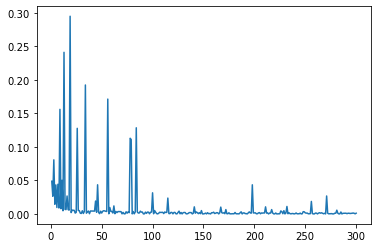

In [37]:
# visualizing the error after each epoch
import matplotlib.pyplot as plt
plt.plot(np.arange(1, epochs + 1), np.array(losses))

----
### Test the model 
เมื่อกระบวนการ Train (ปรับปรุง weight)เสร็จสิ้น จนเป็นที่พอใจแล้วขั้นตอนต่อไปคือการทดสอบ model  
ให้ทำการโหลด Test set เข้ามาทดสอบ


In [38]:
Average = np.zeros((4),dtype='i')


Input = Input_Test.T
Target = Target_Test.T
    
#########################
## Forward Propogation ##
#########################
# calculating hidden layer activations
Hidden = np.dot(weights_input_hidden.T,Input)
Hidden = sigmoid(Hidden)

# calculating the output
Output = np.dot(weights_hidden_output.T, Hidden)
Output = sigmoid(Output)


#check ผล
Class_Output = Output.argmax(axis=0)
Class_Target = Target.argmax(axis=0)
correct = 0
miss = 0
#confusion matrix (row=Actual, col=Predicted)
conf_matrix = np.zeros((NumOutput,NumOutput),dtype='i')
for i in range(NumTest):
    if Class_Output[i] == Class_Target[i]:
        correct += 1
    else:
        miss += 1
    conf_matrix[Class_Target[i]][Class_Output[i]] += 1
print('Confusion Matrix (row=Actual, col=Predicted)')
print(conf_matrix)
print('accuracy = {0:.2f}%'.format((correct/NumTest)*100))
Average[0] = (correct/NumTest)*100

Confusion Matrix (row=Actual, col=Predicted)
[[190   0]
 [  0 153]]
accuracy = 100.00%


## Fold 3

In [39]:
# กำหนด Train Set และ Test set
NumTest = 0
NumTrain = 0
for i in range(NumData):
    #round 2 fold 1,2,4 เป็น train set และ fold3 เป็น test set
    if (i%4) == 2:
        Input_Test[NumTest] = Input_array[i]
        Target_Test[NumTest] = Target_array[i]
        NumTest += 1
    else:
        Input_Train[NumTrain] = Input_array[i]
        Target_Train[NumTrain] = Target_array[i]
        NumTrain += 1
print('Number of Train data: ',NumTrain)
print('Number of Test data: ',NumTest)

np.random.seed(14) 
Input = Input_Train.T
Target = Target_Train.T

Number of Train data:  1029
Number of Test data:  343


In [40]:
# จากข้างต้นทั้งหมด สรุปรวมได้ดังนี้
# กำหนดขนาดของ Network
NumInput = 4
#Number of Hidden Layer = 1
NumHidden = 4
NumOutput = 2
# กำหนดค่าเริ่มต้นของ Weight
weights_input_hidden = np.random.uniform(size=(NumInput,NumHidden))
weights_hidden_output = np.random.uniform(size=(NumHidden, NumOutput))
# กำหนดค่า learning rate
alpha = 0.01


# กำหนด Acitvate function ที่จะนำมาใช้
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# กำหนดจำนวน Epoch
epochs = 300

In [41]:
losses = []
for epoch in range(epochs):
    # random ลำดับของ input ที่จะถูกป้อนเข้า nerual net เพื่อใช้ในการ train
    Train_seq = np.random.permutation(NumTrain)
    
    # Start Train
    for i in range(NumTrain):
    
        #########################
        ## Forward Propogation ##
        #########################
        # calculating hidden layer activations
        Hidden = np.dot(weights_input_hidden.T,Input[:,Train_seq[i]].reshape(NumInput,1) )
        Hidden = sigmoid(Hidden)

        # calculating the output
        Output = np.dot(weights_hidden_output.T, Hidden)
        Output = sigmoid(Output)
        
        ##########################
        ## Backward Propagation ##
        ##########################
        # calculating error
        Error = np.square(Target[:,Train_seq[i]].reshape(NumOutput,1) - Output) / 2

        # calculating rate of change of error w.r.t weight between hidden and output layer
        Error_wrt_output = -(Target[:,Train_seq[i]].reshape(NumOutput,1) - Output)
        Output_wrt_outputLayer_LinearTransform = np.multiply(Output, (1 - Output))
        OutputLayer_LinearTransform_wrt_weights_hidden_output = Hidden

        Error_wrt_weights_hidden_output = np.dot(OutputLayer_LinearTransform_wrt_weights_hidden_output,
                                                 (Error_wrt_output * Output_wrt_outputLayer_LinearTransform).T,)

        # calculating rate of change of error w.r.t weights between input and hidden layer
        OutputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
        HiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(Hidden, (1 - Hidden))
        HiddenLayer_linearTransform_wrt_weights_input_hidden = Input[:,Train_seq[i]].reshape(NumInput,1)
        Error_wrt_weights_input_hidden = np.dot(HiddenLayer_linearTransform_wrt_weights_input_hidden,
            (HiddenLayer_activations_wrt_hiddenLayer_linearTransform
                * np.dot(OutputLayer_LinearTransform_wrt_hiddenLayer_activations,
                (Output_wrt_outputLayer_LinearTransform * Error_wrt_output),)).T,)

        # updating the weights
        weights_hidden_output = weights_hidden_output - alpha * Error_wrt_weights_hidden_output
        weights_input_hidden = weights_input_hidden - alpha * Error_wrt_weights_input_hidden

    # print error at every 100th epoch
    epoch_loss = np.average(Error)
    if epoch % 60 == 0: #ตรวจสอบค่าในตัวแปร epoch ว่าเป็นจำนวนเต็ม
        print(f"Error at epoch {epoch} is {epoch_loss:.10f}") ##แสดงผลลัพธ์เป็นทศนิยม 10 ตำแหน่ง

    # appending the error of each epoch
    losses.append(epoch_loss)

Error at epoch 0 is 0.0496340768
Error at epoch 60 is 0.0020960147
Error at epoch 120 is 0.0021469314
Error at epoch 180 is 0.0017382033
Error at epoch 240 is 0.0010111533


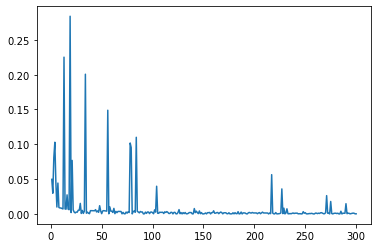

In [42]:
# visualizing the error after each epoch
import matplotlib.pyplot as plt
plt.plot(np.arange(1, epochs + 1), np.array(losses))

In [43]:
Input = Input_Test.T
Target = Target_Test.T
    
#########################
## Forward Propogation ##
#########################
# calculating hidden layer activations
Hidden = np.dot(weights_input_hidden.T,Input)
Hidden = sigmoid(Hidden)

# calculating the output
Output = np.dot(weights_hidden_output.T, Hidden)
Output = sigmoid(Output)


#check ผล
Class_Output = Output.argmax(axis=0)
Class_Target = Target.argmax(axis=0)
correct = 0
miss = 0
#confusion matrix (row=Actual, col=Predicted)
conf_matrix = np.zeros((NumOutput,NumOutput),dtype='i')
for i in range(NumTest):
    if Class_Output[i] == Class_Target[i]:
        correct += 1
    else:
        miss += 1
    conf_matrix[Class_Target[i]][Class_Output[i]] += 1
print('Confusion Matrix (row=Actual, col=Predicted)')
print(conf_matrix)
print('accuracy = {0:.2f}%'.format((correct/NumTest)*100)) #คำนวณเป็นเปอร์เซ็น
Average[1] = (correct/NumTest)*100 #นำค่าที่ได้เก็บไว้ Average

Confusion Matrix (row=Actual, col=Predicted)
[[190   0]
 [  0 153]]
accuracy = 100.00%


## Fold 2

In [44]:
# กำหนด Train Set และ Test set
NumTest = 0
NumTrain = 0
for i in range(NumData):
    #round 3 fold 1,3,4 เป็น train set และ fold2 เป็น test set
    if (i%4) == 1:
        Input_Test[NumTest] = Input_array[i]
        Target_Test[NumTest] = Target_array[i]
        NumTest += 1
    else:
        Input_Train[NumTrain] = Input_array[i]
        Target_Train[NumTrain] = Target_array[i]
        NumTrain += 1
print('Number of Train data: ',NumTrain)
print('Number of Test data: ',NumTest)

np.random.seed(14)
Input = Input_Train.T
Target = Target_Train.T

Number of Train data:  1029
Number of Test data:  343


In [45]:
# จากข้างต้นทั้งหมด สรุปรวมได้ดังนี้
# กำหนดขนาดของ Network
NumInput = 4
#Number of Hidden Layer = 1
NumHidden = 4
NumOutput = 2
# กำหนดค่าเริ่มต้นของ Weight
weights_input_hidden = np.random.uniform(size=(NumInput,NumHidden))
weights_hidden_output = np.random.uniform(size=(NumHidden, NumOutput))
# กำหนดค่า learning rate
alpha = 0.01


# กำหนด Acitvate function ที่จะนำมาใช้
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# กำหนดจำนวน Epoch
epochs = 300

In [46]:
losses = []
for epoch in range(epochs):
    # random ลำดับของ input ที่จะถูกป้อนเข้า nerual net เพื่อใช้ในการ train
    Train_seq = np.random.permutation(NumTrain)
    
    # Start Train
    for i in range(NumTrain):
    
        #########################
        ## Forward Propogation ##
        #########################
        # calculating hidden layer activations
        Hidden = np.dot(weights_input_hidden.T,Input[:,Train_seq[i]].reshape(NumInput,1) )
        Hidden = sigmoid(Hidden)

        # calculating the output
        Output = np.dot(weights_hidden_output.T, Hidden)
        Output = sigmoid(Output)
        
        ##########################
        ## Backward Propagation ##
        ##########################
        # calculating error
        Error = np.square(Target[:,Train_seq[i]].reshape(NumOutput,1) - Output) / 2

        # calculating rate of change of error w.r.t weight between hidden and output layer
        Error_wrt_output = -(Target[:,Train_seq[i]].reshape(NumOutput,1) - Output)
        Output_wrt_outputLayer_LinearTransform = np.multiply(Output, (1 - Output))
        OutputLayer_LinearTransform_wrt_weights_hidden_output = Hidden

        Error_wrt_weights_hidden_output = np.dot(OutputLayer_LinearTransform_wrt_weights_hidden_output,
                                                 (Error_wrt_output * Output_wrt_outputLayer_LinearTransform).T,)

        # calculating rate of change of error w.r.t weights between input and hidden layer
        OutputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
        HiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(Hidden, (1 - Hidden))
        HiddenLayer_linearTransform_wrt_weights_input_hidden = Input[:,Train_seq[i]].reshape(NumInput,1)
        Error_wrt_weights_input_hidden = np.dot(HiddenLayer_linearTransform_wrt_weights_input_hidden,
            (HiddenLayer_activations_wrt_hiddenLayer_linearTransform
                * np.dot(OutputLayer_LinearTransform_wrt_hiddenLayer_activations,
                (Output_wrt_outputLayer_LinearTransform * Error_wrt_output),)).T,)

        # updating the weights
        weights_hidden_output = weights_hidden_output - alpha * Error_wrt_weights_hidden_output
        weights_input_hidden = weights_input_hidden - alpha * Error_wrt_weights_input_hidden

    # print error at every 100th epoch
    epoch_loss = np.average(Error)
    if epoch % 60 == 0:
        print(f"Error at epoch {epoch} is {epoch_loss:.10f}")

    # appending the error of each epoch
    losses.append(epoch_loss)

Error at epoch 0 is 0.0501831008
Error at epoch 60 is 0.0003292344
Error at epoch 120 is 0.0021547059
Error at epoch 180 is 0.0017442882
Error at epoch 240 is 0.0000462513


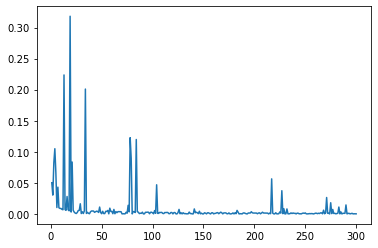

In [47]:
# visualizing the error after each epoch
import matplotlib.pyplot as plt
plt.plot(np.arange(1, epochs + 1), np.array(losses))

In [48]:
Input = Input_Test.T
Target = Target_Test.T
    
#########################
## Forward Propogation ##
#########################
# calculating hidden layer activations
Hidden = np.dot(weights_input_hidden.T,Input)
Hidden = sigmoid(Hidden)

# calculating the output
Output = np.dot(weights_hidden_output.T, Hidden)
Output = sigmoid(Output)


#check ผล
Class_Output = Output.argmax(axis=0)
Class_Target = Target.argmax(axis=0)
correct = 0
miss = 0
#confusion matrix (row=Actual, col=Predicted)
conf_matrix = np.zeros((NumOutput,NumOutput),dtype='i')
for i in range(NumTest):
    if Class_Output[i] == Class_Target[i]:
        correct += 1
    else:
        miss += 1
    conf_matrix[Class_Target[i]][Class_Output[i]] += 1
print('Confusion Matrix (row=Actual, col=Predicted)')
print(conf_matrix)
print('accuracy = {0:.2f}%'.format((correct/NumTest)*100))
Average[2] = (correct/NumTest)*100

Confusion Matrix (row=Actual, col=Predicted)
[[191   0]
 [  0 152]]
accuracy = 100.00%


## Fold 1

In [49]:
# กำหนด Train Set และ Test set
NumTest = 0
NumTrain = 0
for i in range(NumData):
    #round 4 fold 2,3,4 เป็น train set และ fold1 เป็น test set
    if (i%4) == 0:
        Input_Test[NumTest] = Input_array[i]
        Target_Test[NumTest] = Target_array[i]
        NumTest += 1
    else:
        Input_Train[NumTrain] = Input_array[i]
        Target_Train[NumTrain] = Target_array[i]
        NumTrain += 1
print('Number of Train data: ',NumTrain)
print('Number of Test data: ',NumTest)

np.random.seed(14)
Input = Input_Train.T
Target = Target_Train.T

Number of Train data:  1029
Number of Test data:  343


In [50]:
# จากข้างต้นทั้งหมด สรุปรวมได้ดังนี้
# กำหนดขนาดของ Network
NumInput = 4
#Number of Hidden Layer = 1
NumHidden = 4
NumOutput = 2
# กำหนดค่าเริ่มต้นของ Weight
weights_input_hidden = np.random.uniform(size=(NumInput,NumHidden))
weights_hidden_output = np.random.uniform(size=(NumHidden, NumOutput))
# กำหนดค่า learning rate
alpha = 0.01


# กำหนด Acitvate function ที่จะนำมาใช้
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# กำหนดจำนวน Epoch
epochs = 300

In [51]:
losses = []
for epoch in range(epochs):
    # random ลำดับของ input ที่จะถูกป้อนเข้า nerual net เพื่อใช้ในการ train
    Train_seq = np.random.permutation(NumTrain)
    
    # Start Train
    for i in range(NumTrain):
    
        #########################
        ## Forward Propogation ##
        #########################
        # calculating hidden layer activations
        Hidden = np.dot(weights_input_hidden.T,Input[:,Train_seq[i]].reshape(NumInput,1) )
        Hidden = sigmoid(Hidden)

        # calculating the output
        Output = np.dot(weights_hidden_output.T, Hidden)
        Output = sigmoid(Output)
        
        ##########################
        ## Backward Propagation ##
        ##########################
        # calculating error
        Error = np.square(Target[:,Train_seq[i]].reshape(NumOutput,1) - Output) / 2

        # calculating rate of change of error w.r.t weight between hidden and output layer
        Error_wrt_output = -(Target[:,Train_seq[i]].reshape(NumOutput,1) - Output)
        Output_wrt_outputLayer_LinearTransform = np.multiply(Output, (1 - Output))
        OutputLayer_LinearTransform_wrt_weights_hidden_output = Hidden

        Error_wrt_weights_hidden_output = np.dot(OutputLayer_LinearTransform_wrt_weights_hidden_output,
                                                 (Error_wrt_output * Output_wrt_outputLayer_LinearTransform).T,)

        # calculating rate of change of error w.r.t weights between input and hidden layer
        OutputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
        HiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(Hidden, (1 - Hidden))
        HiddenLayer_linearTransform_wrt_weights_input_hidden = Input[:,Train_seq[i]].reshape(NumInput,1)
        Error_wrt_weights_input_hidden = np.dot(HiddenLayer_linearTransform_wrt_weights_input_hidden,
            (HiddenLayer_activations_wrt_hiddenLayer_linearTransform
                * np.dot(OutputLayer_LinearTransform_wrt_hiddenLayer_activations,
                (Output_wrt_outputLayer_LinearTransform * Error_wrt_output),)).T,)

        # updating the weights
        weights_hidden_output = weights_hidden_output - alpha * Error_wrt_weights_hidden_output
        weights_input_hidden = weights_input_hidden - alpha * Error_wrt_weights_input_hidden

    # print error at every 100th epoch
    epoch_loss = np.average(Error)
    if epoch % 60 == 0:
        print(f"Error at epoch {epoch} is {epoch_loss:.10f}")

    # appending the error of each epoch
    losses.append(epoch_loss)

Error at epoch 0 is 0.0515438932
Error at epoch 60 is 0.0001407740
Error at epoch 120 is 0.0022748954
Error at epoch 180 is 0.0018234443
Error at epoch 240 is 0.0000541729


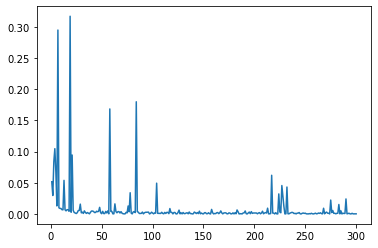

In [52]:
# visualizing the error after each epoch
import matplotlib.pyplot as plt
plt.plot(np.arange(1, epochs + 1), np.array(losses))

In [53]:
Input = Input_Test.T
Target = Target_Test.T
    
#########################
## Forward Propogation ##
#########################
# calculating hidden layer activations
Hidden = np.dot(weights_input_hidden.T,Input)
Hidden = sigmoid(Hidden)

# calculating the output
Output = np.dot(weights_hidden_output.T, Hidden)
Output = sigmoid(Output)


#check ผล
Class_Output = Output.argmax(axis=0)
Class_Target = Target.argmax(axis=0)
correct = 0
miss = 0
#confusion matrix (row=Actual, col=Predicted)
conf_matrix = np.zeros((NumOutput,NumOutput),dtype='i')
for i in range(NumTest):
    if Class_Output[i] == Class_Target[i]:
        correct += 1
    else:
        miss += 1
    conf_matrix[Class_Target[i]][Class_Output[i]] += 1
print('Confusion Matrix (row=Actual, col=Predicted)')
print(conf_matrix)
print('accuracy = {0:.2f}%'.format((correct/NumTest)*100))
Average[3] = (correct/NumTest)*100

Confusion Matrix (row=Actual, col=Predicted)
[[191   0]
 [  0 152]]
accuracy = 100.00%


In [54]:
print("Average accuracy of model : ",np.average(Average),"%")

Average accuracy of model :  100.0 %
